# --- Day 22: Sporifica Virus ---

Diagnostics indicate that the local grid computing cluster has been contaminated with the Sporifica Virus. The grid computing cluster is a seemingly-infinite two-dimensional grid of compute nodes. Each node is either clean or infected by the virus.

To prevent overloading the nodes (which would render them useless to the virus) or detection by system administrators, exactly one virus carrier moves through the network, infecting or cleaning nodes as it moves. The virus carrier is always located on a single node in the network (the current node) and keeps track of the direction it is facing.

To avoid detection, the virus carrier works in bursts; in each burst, it wakes up, does some work, and goes back to sleep. The following steps are all executed in order one time each burst:

If the current node is infected, it turns to its right. Otherwise, it turns to its left. (Turning is done in-place; the current node does not change.)
If the current node is clean, it becomes infected. Otherwise, it becomes cleaned. (This is done after the node is considered for the purposes of changing direction.)
The virus carrier moves forward one node in the direction it is facing.
Diagnostics have also provided a map of the node infection status (your puzzle input). Clean nodes are shown as .; infected nodes are shown as #. This map only shows the center of the grid; there are many more nodes beyond those shown, but none of them are currently infected.

The virus carrier begins in the middle of the map facing up.

For example, suppose you are given a map like this:

```
..#
#..
...
```

Then, the middle of the infinite grid looks like this, with the virus carrier's position marked with [ ]:

```
. . . . . . . . .
. . . . . . . . .
. . . . . . . . .
. . . . . # . . .
. . . #[.]. . . .
. . . . . . . . .
. . . . . . . . .
. . . . . . . . .
```

The virus carrier is on a clean node, so it turns left, infects the node, and moves left:

```
. . . . . . . . .
. . . . . . . . .
. . . . . . . . .
. . . . . # . . .
. . .[#]# . . . .
. . . . . . . . .
. . . . . . . . .
. . . . . . . . .
```

The virus carrier is on an infected node, so it turns right, cleans the node, and moves up:

```
. . . . . . . . .
. . . . . . . . .
. . . . . . . . .
. . .[.]. # . . .
. . . . # . . . .
. . . . . . . . .
. . . . . . . . .
. . . . . . . . .
```

Four times in a row, the virus carrier finds a clean, infects it, turns left, and moves forward, ending in the same place and still facing up:

```
. . . . . . . . .
. . . . . . . . .
. . . . . . . . .
. . #[#]. # . . .
. . # # # . . . .
. . . . . . . . .
. . . . . . . . .
. . . . . . . . .
```

Now on the same node as before, it sees an infection, which causes it to turn right, clean the node, and move forward:

```
. . . . . . . . .
. . . . . . . . .
. . . . . . . . .
. . # .[.]# . . .
. . # # # . . . .
. . . . . . . . .
. . . . . . . . .
. . . . . . . . .
```

After the above actions, a total of 7 bursts of activity had taken place. Of them, 5 bursts of activity caused an infection.

After a total of 70, the grid looks like this, with the virus carrier facing up:

```
. . . . . # # . .
. . . . # . . # .
. . . # . . . . #
. . # . #[.]. . #
. . # . # . . # .
. . . . . # # . .
. . . . . . . . .
. . . . . . . . .
```

By this time, 41 bursts of activity caused an infection (though most of those nodes have since been cleaned).

After a total of 10000 bursts of activity, 5587 bursts will have caused an infection.

**Given your actual map, after 10000 bursts of activity, how many bursts cause a node to become infected?** (Do not count nodes that begin infected.)

In [1]:
# the puzzle input
with open('puzzle_inputs/day22_input.txt') as f:
    data = f.read().strip().split("\n")
puzzle_input = [line for line in data]
puzzle_input

['..####.###.##..##....##..',
 '.##..#.###.##.##.###.###.',
 '......#..#.#.....#.....#.',
 '##.###.#.###.##.#.#..###.',
 '#..##...#.....##.#..###.#',
 '.#..#...####...#.....###.',
 '##...######.#.###..#.##..',
 '###..#..##.###....##.....',
 '.#.#####.###.#..#.#.#..#.',
 '#.#.##.#.##..#.##..#....#',
 '..#.#.#.#.#.##...#.####..',
 '##.##..##...#..##..#.####',
 '#.#..####.##.....####.##.',
 '..####..#.#.#.#.##..###.#',
 '..#.#.#.###...#.##..###..',
 '#.####.##..###.#####.##..',
 '.###.##...#.#.#.##....#.#',
 '#...######...#####.###.#.',
 '#.####.#.#..#...##.###...',
 '####.#.....###..###..#.#.',
 '..#.##.####.#######.###..',
 '#.##.##.#.#.....#...#...#',
 '###.#.###..#.#...#...##..',
 '##..###.#..#####.#..##..#',
 '#......####.#.##.#.###.##']

First up, looking at our map as a grid:

In [178]:
import numpy as np
import matplotlib.pyplot as plt

def convert_to_grid(s):
    """takes in a list of strings and returns a 2d grid representation"""
    rows = [np.array([c for c in row], dtype="U") for row in s]
    return np.array(rows, dtype="U")

grid = convert_to_grid(puzzle_input)
grid[0:5,0:5]

array([['.', '.', '#', '#', '#'],
       ['.', '#', '#', '.', '.'],
       ['.', '.', '.', '.', '.'],
       ['#', '#', '.', '#', '#'],
       ['#', '.', '.', '#', '#']],
      dtype='<U4')

In [309]:
test_input = """..#
#..
...""".split("\n")
test_grid = convert_to_grid(test_input)
test_grid

array([['.', '.', '#'],
       ['#', '.', '.'],
       ['.', '.', '.']],
      dtype='<U4')

We need to grow the grid as the virus moves to the ends:

In [357]:
def make_bigger_grid(grid=test_grid):
    """takes in a numpy array and returns a bigger one"""
    size = len(grid) + 2
    new_grid = np.empty((size,size), dtype="U")
    new_grid.fill(".")
    new_grid[1:-1,1:-1] = grid
    return new_grid

assert np.all(make_bigger_grid(test_grid)[1:-1,1:-1] == test_grid)
make_bigger_grid(test_grid)

array([['.', '.', '.', '.', '.'],
       ['.', '.', '.', '#', '.'],
       ['.', '#', '.', '.', '.'],
       ['.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.']],
      dtype='<U1')

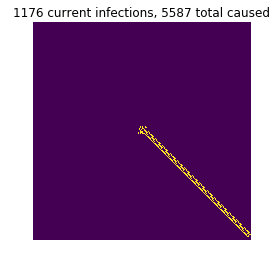

In [426]:
class Virus:
    """takes in a grid, moves the virus and returns new grid"""
    def __init__(self, initial_map):
        self.directions = {0:"UP", 1:"RIGHT", 2:"DOWN", 3:"LEFT"}
        self.dir = 0
        self.moves = {0: [0,-1], 1: [1,0], 2: [0,1], 3:[-1,0]}
        self.grid = convert_to_grid(initial_map)
        x = y = len(self.grid) // 2
        self.pos = np.array([x,y])
        self.infections = 0 # all infections ever caused
        self.steps = 0 # number of steps the virus has taken

    def step(self):
        x,y = self.pos
        
        if self.grid[y,x] == "#":
            self.dir = (self.dir + 1) % 4 # turn right
            self.grid[y,x] = "."
        else:
            self.dir = (self.dir + 3) % 4 # turn left
            self.grid[y,x] = "#"
            self.infections += 1
        
        self.pos += self.moves[self.dir]
        
        if np.any(self.pos <= 0) or np.any(self.pos >= len(self.grid)):
            self.grid = make_bigger_grid(self.grid)
            self.pos += [1,1]
        
        self.steps += 1
            
    def plot(self):
        """takes in a pattern as a string and plots it"""
        binary_grid = [c == "#" for c in [row for row in self.grid]]
        plt.imshow(binary_grid)
        plt.title(f"{np.sum(binary_grid)} current infections, {self.infections} total caused")
        plt.axis('off')
        plt.show()
        
virus = Virus(test_input)
for i in range(10000):
    virus.step()
virus.plot()

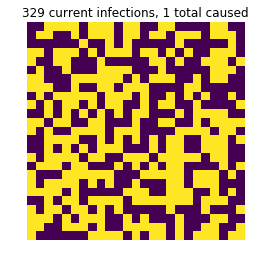

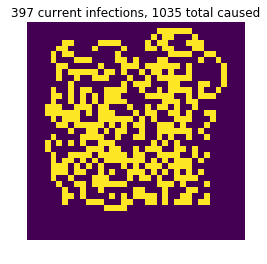

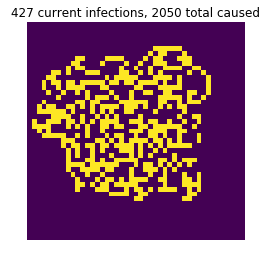

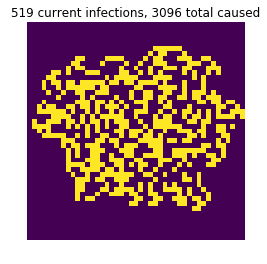

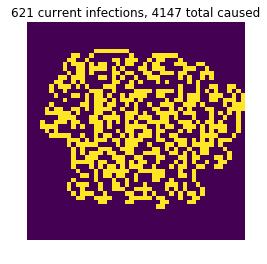

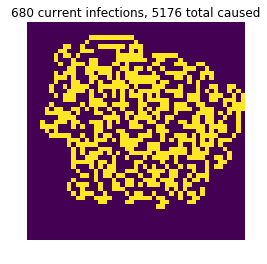

In [427]:
virus = Virus(puzzle_input)
for i in range(10000):
    virus.step()
    
    if i % 2000 == 0:
        virus.plot()
    
virus.plot()

`5176` is the right answer

# Part 2

--- Part Two ---
As you go to remove the virus from the infected nodes, it evolves to resist your attempt.

Now, before it infects a clean node, it will weaken it to disable your defenses. If it encounters an infected node, it will instead flag the node to be cleaned in the future. So:

- Clean nodes become weakened. show as `W`
- Weakened nodes become infected. show as `#`
- Infected nodes become flagged. show as `F`
- Flagged nodes become clean. show as `.`

Every node is always in exactly one of the above states.

The virus carrier still functions in a similar way, but now uses the following logic during its bursts of action:

Decide which way to turn based on the current node:

- If it is clean, it turns left.
- If it is weakened, it does not turn, and will continue moving in the same direction.
- If it is infected, it turns right.
- If it is flagged, it reverses direction, and will go back the way it came.

Modify the state of the current node, as described above.
The virus carrier moves forward one node in the direction it is facing.

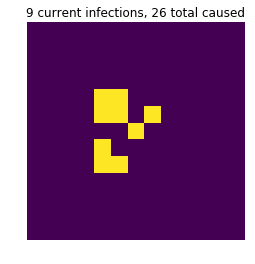

In [428]:
class Smart_Virus:
    """takes in a grid, moves the virus and returns new grid"""
    def __init__(self, initial_map):
        self.directions = {0:"UP", 1:"RIGHT", 2:"DOWN", 3:"LEFT"}
        self.dir = 0
        self.moves = {0: [0,-1], 1: [1,0], 2: [0,1], 3:[-1,0]}
        self.grid = convert_to_grid(initial_map)
        x = y = len(self.grid) // 2
        self.pos = np.array([x,y])
        self.infections = 0 # all infections ever caused
        self.steps = 0 # number of steps the virus has taken

    def step(self):
        x,y = self.pos
        val = self.grid[y,x]
        
        if self.grid[y,x] == "#":
            self.dir = (self.dir + 1) % 4 # turn right
            self.grid[y,x] = "F"
        elif val == ".":
            self.dir = (self.dir + 3) % 4 # turn left
            self.grid[y,x] = "W"
        elif val == "F":
            self.dir = (self.dir + 2) % 4 # reverse dir
            self.grid[y,x] = "."
        elif val == "W":
            self.grid[y,x] = "#"
            self.infections += 1
        else:
            print("Shouldn't reach here")
            
        self.pos += self.moves[self.dir]
        
        if np.any(self.pos <= 0) or np.any(self.pos >= len(self.grid)):
            self.grid = make_bigger_grid(self.grid)
            self.pos += [1,1]
        
        #self.steps += 1
            
    def plot(self):
        """takes in a pattern as a string and plots it"""
        binary_grid = [c == "#" for c in [row for row in self.grid]]
        plt.imshow(binary_grid)
        plt.title(f"{np.sum(binary_grid)} current infections, {self.infections} total caused")
        plt.axis('off')
        plt.show()
        
smart_virus = Smart_Virus(test_input)
for i in range(100):
    smart_virus.step()
smart_virus.plot()

--- At step 0 ---


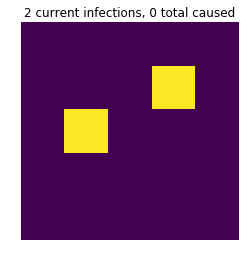

--- At step 2000000 ---


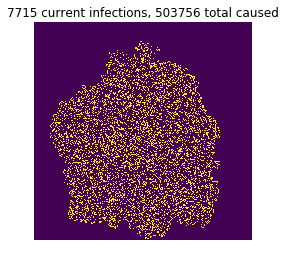

--- At step 4000000 ---


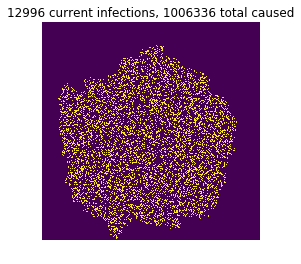

--- At step 6000000 ---


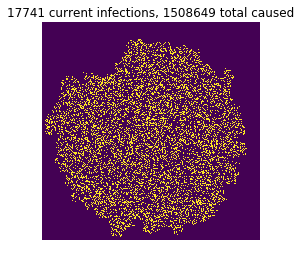

--- At step 8000000 ---


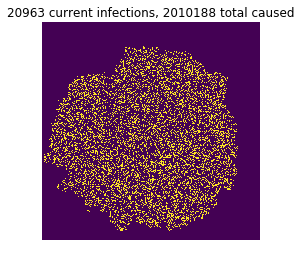

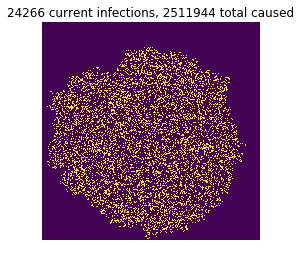

In [431]:
smart_virus = Smart_Virus(test_input)
for i in range(10000000):
    smart_virus.step()
    if i % 2000000 == 0:
        print(f"--- At step {i} ---")
        smart_virus.plot()
        
smart_virus.plot()

--- At step 0 ---


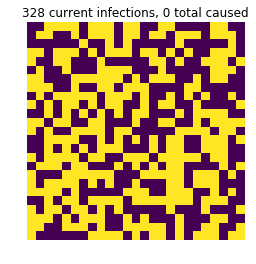

--- At step 2000000 ---


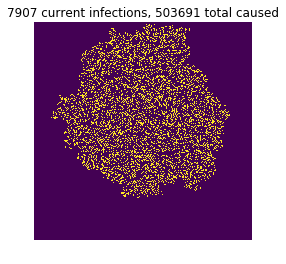

--- At step 4000000 ---


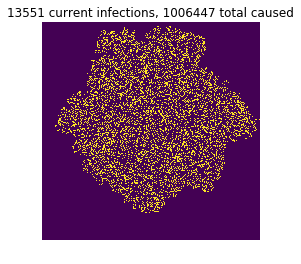

--- At step 6000000 ---


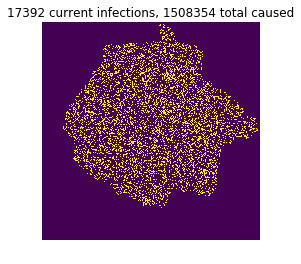

--- At step 8000000 ---


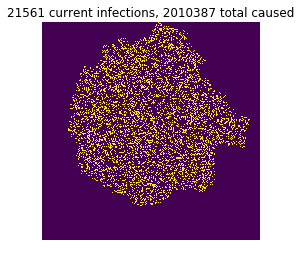

--- Final step 9999999 ---


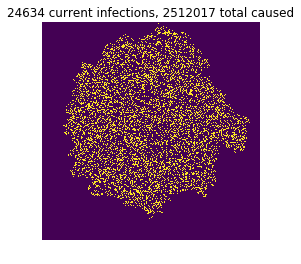

In [432]:
smart_virus = Smart_Virus(puzzle_input)
for i in range(10000000):
    smart_virus.step()
    if i % 2000000 == 0:
        print(f"--- At step {i} ---")
        smart_virus.plot()

print(f"--- Final step {i} ---")        
smart_virus.plot()

`2512017` ans to part 2

# Notes

- i can speed up part two by using integers instead of strings
- look into using a dict instead of a numpy array, and only storing the non blank states, assuming any coordinate which isn't in the dict is a clean node. 